<a href="https://colab.research.google.com/github/syphaxAouadene/Cours_programmation_concurrente/blob/main/classify_handwriten_digit_with_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import time
from IPython.display import clear_output
# import findspark
import json
import matplotlib.pyplot as plt
%pylab inline
import os

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from mlxtend.data import loadlocal_mnist
import platform

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
images_path = '/content/drive/MyDrive/Colab Notebooks/mnist_data/train-images.idx3-ubyte'
labels_path = '/content/drive/MyDrive/Colab Notebooks/mnist_data/train-labels.idx1-ubyte'
images, labels = loadlocal_mnist(images_path, labels_path)
images = images.reshape(60000, 28, 28)

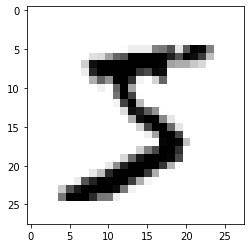

In [ ]:
plt.imshow(images[0], cmap=plt.cm.binary)
plt.show()

In [ ]:
len(images)

60000

# feedforward and backpropagation :

epoch  0  -------> loss :  3.625925692120682  | time :  52.5753276348114
epoch  1  -------> loss :  2.3025266694919098  | time :  52.471380949020386
epoch  2  -------> loss :  2.301225821632795  | time :  52.84491443634033
epoch  3  -------> loss :  2.3012124931813767  | time :  53.2004292011261
epoch  4  -------> loss :  2.30121210410645  | time :  52.40338897705078
epoch  5  -------> loss :  2.301212073005699  | time :  53.16133904457092
epoch  6  -------> loss :  2.301212070071239  | time :  52.99147152900696
epoch  7  -------> loss :  2.301212069791412  | time :  53.43586254119873
epoch  8  -------> loss :  2.3012120697647154  | time :  51.93843078613281
epoch  9  -------> loss :  2.3012120697621636  | time :  51.75092053413391
--- 527.1399838924408 seconds ---  | time :  527.1399912834167


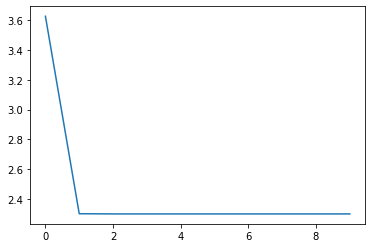

In [ ]:
def fcl(inputs_layer, nbr_neurons, weights, biais, activation_type='ReLU'):
    current_layer = []
    current_layer = flatten(np.dot(weights, inputs_layer) + biais) 
    output_layer = activation_function(current_layer, activation_type)
    
    return output_layer.reshape(len(output_layer), 1)

def fcl_softmax(inputs_layer, nbr_neurons, weights, biais, activation_type='ReLU'):
    current_layer = []
    current_layer = flatten(np.dot(weights, inputs_layer) + biais)
#     output_layer = activation_function(current_layer, activation_type)
    output_layer = current_layer
    return output_layer.reshape(len(output_layer), 1)
   
def activation_function(layer, type_of_activation='relu'):
    type_of_activation = type_of_activation.lower()
    switcher = {
        'relu': ReLU,
        'tanh': tanh,
        'segmoid': segmoid
    }
    # Get the function from switcher dictionary
    activation_type = switcher.get(type_of_activation, lambda: "Invalid type_of_activation_function, please choose either 'ReLU' or 'tanh' or 'segmoid' !")
    return activation_type(layer)
    
    
def ReLU(layer):
    return layer * (layer > 0)

def d_ReLU(layer):
    return 1. * (layer > 0)

def tanh(layer):
    r = (np.exp(layer)-np.exp(-1*layer))/(np.exp(layer)+np.exp(-1*layer))   
    return np.array(r)

def d_tanh(layer):
  return 1 - tanh(layer) * tanh(layer)

# def tanh(layer):
#     result = []
#     for y in layer:
#         r = (np.exp(y)-np.exp(-1*y))/(np.exp(y)+np.exp(-1*y))
#         result.append(r)
#     return np.array(result)

# def segmoid(layer):
#     result = []
#     for y in layer:
#         r = 1/(1+np.exp(-1*y))
#         result.append(r)
#     return np.array(result)

def segmoid(layer):
    # print(layer)
    return np.array(1/(1+np.exp(-1*layer)))

def softmax(data):
    output = []
    for value in data:
        proba_value = np.exp(value)/(np.sum(np.exp(data)))
        output.append(proba_value)
    return np.array(output)

def categoricalCrossEntropy(generated_values, target_values):
    somme = 0
    for i in range(len(generated_values)):
        somme = somme + target_values[i] * np.log(generated_values[i])
    return (-1) * somme 


def update_weights(dL_dY, weights, biais, inputs, lrate):
    """
    arguments :
    dL_dY : un vecteur des dérivées de la couche supérieure par rapport a la couche de sortie Y de dimension n_outputs
    weights : la matrice des poids de dimension (n_inputs x n_outputs)
    inputs : le vecteur de sortie de la couche précedente de dimension n_inputs
    lrate : learning rate (scalar)
    """
    dL_dW = np.dot(dL_dY, np.transpose(inputs))
    new_weights = flatten(weights) - lrate * flatten(dL_dW)
    # if (weights.flatten() == new_weights.flatten()).all():
    #   print('################## koko #################"')
    new_biais = biais - lrate * dL_dY
    return new_weights.reshape(weights.shape), new_biais

def calcul_dL_dX(dL_dY, weights):
    
    return np.dot(np.transpose(weights), dL_dY)

def normelize(img):
    return img/255

def flatten(img):
    return img.flatten()


def d_segmoid(vector):
    """
    cette fontion prend un vector en entrée et retourne la dérivée de segmoid par rapport a ce vector
    """
    return segmoid(vector) * (1 - segmoid(vector))


def show_image(img):
    plt.imshow(img, cmap=plt.cm.binary)
    plt.show()
    


# img = images[0]
# # on normalize notre image en divisant par 255 pour avoir des valeurs entre 0 et 1
# normelized_img = normelize(img)
# flatten_normelized_img = flatten(normelized_img)
# input_to_fcl_1 = np.array(flatten_normelized_img).reshape(len(flatten_normelized_img), 1)


start_time = time.time()

random.seed(10)
w1 = np.random.randn(128, 28*28)
random.seed(11)
b1 = np.random.randn(128, 1)

random.seed(12)
w2 = np.random.randn(10, 128)
random.seed(13)
b2 = np.random.randn(10, 1)

# random.seed(12)
# w3 = np.random.randn(10, 40)
# b3 = np.random.randn(10, 1)

losses = []
loss = 0
for j in range(10):
    batch_losses = []
    start_batch_time = time.time()
    for i in range(50000):
        
        img = images[i]
        # on normalize notre image end ivisant par 255 pour avoir des valeurs entre 0 et 1
        normelized_img = normelize(img)
        flatten_normelized_img = flatten(normelized_img)
        input_to_fcl_1 = np.array(flatten_normelized_img).reshape(len(flatten_normelized_img), 1)
        output_of_fcl_1 = fcl(input_to_fcl_1, 128, w1, b1, 'relu')
        input_to_fcl_2 = output_of_fcl_1
#         output_of_fcl_2 = fcl(input_to_fcl_2, 10, w2, b2, 'segmoid')
        output_of_fcl_2 = fcl_softmax(input_to_fcl_2, 10, w2, b2, 'relu')
#         input_to_fcl_3 = output_of_fcl_2
#         output_of_fcl_3 = fcl(input_to_fcl_3, 10, w3, b3, 'segmoid')
        # SOFTMAX
        input_to_softmax = output_of_fcl_2
        output_of_softmax = softmax(input_to_softmax)
        # CCE
        
        generated_values = output_of_softmax
#         print(generated_values)
        
        target_values = np.eye(10)[labels[i]].reshape(10, 1)
        loss = categoricalCrossEntropy(generated_values, target_values)
        batch_losses.append(loss)
        # BACKPROPAGATION
        dl_dofcl2 = generated_values - target_values
#         dl_dofcl2 = d_segmoid(dl_dofcl2)
        
#         new_w3 = update_weights(dl_dofcl3, w3, input_to_fcl_3, 0.1)
#         print(loss)
#         dl_dofcl2 = calcul_dL_dX(dl_dofcl3, w3)
#         dl_dofcl2 = d_segmoid(dl_dofcl2)
        # update w2
        new_w2, new_b2 = update_weights(dl_dofcl2, w2, b2, input_to_fcl_2, 0.0005)
        dl_dofcl1 = calcul_dL_dX(dl_dofcl2, w2)
        # dl_dofcl1 = d_tanh(dl_dofcl1)
        dl_dofcl1 = d_ReLU(dl_dofcl1)
        # update w1
        new_w1, new_b1 = update_weights(dl_dofcl1, w1, b1, input_to_fcl_1, 0.0005)
        w1 = new_w1
        w2 = new_w2
        b1 = new_b1
        b2 = new_b2
#         w3 = new_w3
    print('epoch ',j,' -------> loss : ',np.array(batch_losses).mean(), ' | time : ',(time.time() - start_batch_time))
    losses.append(np.array(batch_losses).mean())

print("--- %s seconds ---" % (time.time() - start_time), ' | time : ',(time.time() - start_time)) 
# gpu : 458.5637192726135 seconds ---
# tpu : --- 641.5484182834625 seconds ---
# cpu_myLapTop : --- 602.4395906925201 seconds ---
# cpu_googleColab : --- 583.7042846679688 seconds ---
plt.plot(losses)

In [ ]:
i, j

(49999, 5)

In [ ]:
def segmoid(layer):
    print(layer)
    return np.array(1/(1+np.exp(-1*layer)))

for i in range(50000):
  img = images[i]
  # on normalize notre image end ivisant par 255 pour avoir des valeurs entre 0 et 1
  normelized_img = normelize(img)
  flatten_normelized_img = flatten(normelized_img)
  input_to_fcl_1 = np.array(flatten_normelized_img).reshape(len(flatten_normelized_img), 1)
  output_of_fcl_1 = fcl(input_to_fcl_1, 128, w1, b1, 'segmoid')
  input_to_fcl_2 = output_of_fcl_1
  #         output_of_fcl_2 = fcl(input_to_fcl_2, 10, w2, b2, 'segmoid')
  output_of_fcl_2 = fcl_softmax(input_to_fcl_2, 10, w2, b2, 'segmoid')
  #         input_to_fcl_3 = output_of_fcl_2
  #         output_of_fcl_3 = fcl(input_to_fcl_3, 10, w3, b3, 'segmoid')
  # SOFTMAX
  input_to_softmax = output_of_fcl_2
  output_of_softmax = softmax(input_to_softmax)
  # CCE

  generated_values = output_of_softmax
  #         print(generated_values)

  target_values = np.eye(10)[labels[i]].reshape(10, 1)
  loss = categoricalCrossEntropy(generated_values, target_values)
  batch_losses.append(loss)
  # BACKPROPAGATION
  dl_dofcl2 = generated_values - target_values
  #         dl_dofcl2 = d_segmoid(dl_dofcl2)

  #         new_w3 = update_weights(dl_dofcl3, w3, input_to_fcl_3, 0.1)
  #         print(loss)
  #         dl_dofcl2 = calcul_dL_dX(dl_dofcl3, w3)
  #         dl_dofcl2 = d_segmoid(dl_dofcl2)
  # update w2
  new_w2, new_b2 = update_weights(dl_dofcl2, w2, b2, input_to_fcl_2, 0.0001)
  dl_dofcl1 = calcul_dL_dX(dl_dofcl2, w2)
  dl_dofcl1 = d_segmoid(dl_dofcl1)
  # update w1
  new_w1, new_b1 = update_weights(dl_dofcl1, w1, b1, input_to_fcl_1, 0.0001)
  w1 = new_w1
  w2 = new_w2
  b1 = new_b1
  b2 = new_b2
  #         w3 = new_w3

In [ ]:
def classify(img, w1, w2, b1, b2):
    # on normalize notre image end ivisant par 255 pour avoir des valeurs entre 0 et 1
    normelized_img = normelize(img)
    flatten_normelized_img = flatten(normelized_img)
    input_to_fcl_1 = np.array(flatten_normelized_img).reshape(len(flatten_normelized_img), 1)
#     print(input_to_fcl_1)
    output_of_fcl_1 = fcl(input_to_fcl_1, 128, w1, b1, 'segmoid')
    # print(output_of_fcl_1)
    input_to_fcl_2 = output_of_fcl_1
#     print(input_to_fcl_2)
#         output_of_fcl_2 = fcl(input_to_fcl_2, 10, w2, b2, 'segmoid')
    output_of_fcl_2 = fcl_softmax(input_to_fcl_2, 10, w2, b2, 'segmoid')
#         input_to_fcl_3 = output_of_fcl_2
#         output_of_fcl_3 = fcl(input_to_fcl_3, 10, w3, b3, 'segmoid')
    # SOFTMAX
    input_to_softmax = output_of_fcl_2
#     print(input_to_softmax)
    output_of_softmax = softmax(input_to_softmax)
    # CCE
    print(output_of_softmax)
#     print(output_of_softmax)
    return output_of_softmax.argmax()

classify(images[50202], w1, w2, b1, b2)

[[0.09927115]
 [0.11074163]
 [0.09954261]
 [0.10156663]
 [0.09729269]
 [0.09077401]
 [0.09981214]
 [0.103788  ]
 [0.09676999]
 [0.10044115]]


1

In [ ]:
classify(images[50203], w1, w2, b1, b2)

[[0.09927115]
 [0.11074163]
 [0.09954261]
 [0.10156663]
 [0.09729269]
 [0.09077401]
 [0.09981214]
 [0.103788  ]
 [0.09676999]
 [0.10044115]]


1

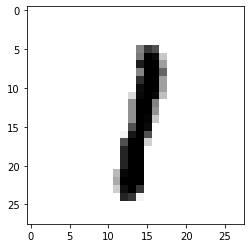

In [ ]:
show_image(images[1200])